In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import scanpy as sc
import torch
import lineagevi

In [4]:
adata_path = '/Users/lgolinelli/git/lineageVI/notebooks/data/outputs/pancreas_2025.08.17_12.43.17/adata_with_velocity.h5ad'
model_path = '/Users/lgolinelli/git/lineageVI/notebooks/data/outputs/pancreas_2025.08.17_12.43.17/vae_velocity_model.pt'

adata = sc.read_h5ad(adata_path)

model = lineagevi.trainer.LineageVI(
    adata,
)

model.load_state_dict(torch.load(model_path, map_location='cpu'))
model.eval()


LineageVI(
  (encoder): Encoder(
    (encoder): Sequential(
      (0): Linear(in_features=1805, out_features=128, bias=True)
      (1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
      (2): ReLU()
    )
    (mean_layer): Linear(in_features=128, out_features=647, bias=True)
    (logvar_layer): Linear(in_features=128, out_features=647, bias=True)
  )
  (gene_decoder): MaskedLinearDecoder(
    (linear): Linear(in_features=647, out_features=1805, bias=True)
  )
  (velocity_decoder): VelocityDecoder(
    (shared_decoder): Sequential(
      (0): Linear(in_features=647, out_features=128, bias=True)
      (1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
      (2): ReLU()
    )
    (gp_velocity_decoder): Linear(in_features=128, out_features=647, bias=True)
    (gene_velocity_decoder): Sequential(
      (0): Linear(in_features=128, out_features=5415, bias=True)
      (1): Softplus(beta=1.0, threshold=20.0)
    )
  )
)

In [30]:
import numpy as np
# Same seed -> identical draw
_, v1 = model.get_velocity(adata, n_samples=1, return_mean=False, base_seed=123)
_, v2 = model.get_velocity(adata, n_samples=1, return_mean=False, base_seed=123)
assert np.allclose(v1, v2)

# Different seeds -> different draw
_, v3 = model.get_velocity(adata, n_samples=1, return_mean=False, base_seed=124)
assert not np.allclose(v1, v3)


In [37]:
_, V = model.get_velocity(adata, n_samples=50, return_mean=False, base_seed=123)

In [ ]:
V.shape

(50, 3696, 1805)

In [41]:
V[0,0] - V[0,1]


array([-0.04718103, -0.46680963,  0.10111748, ...,  0.13123634,
        0.03651446,  0.21248677], shape=(1805,), dtype=float32)

In [25]:
velocity_u, velocity2 = model.get_velocity(adata, n_samples=1, return_mean=False)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 108 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 492 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 780 tasks      | elapsed:   21.1s
[Parallel(n_jobs=-1)]: Done 1132 tasks      | elapsed:   29.5s
[Parallel(n_jobs=-1)]: Done 1548 tasks      | elapsed:   39.8s
[Parallel(n_jobs=-1)]: Done 2028 tasks      | elapsed:   51.6s
[Parallel(n_jobs=-1)]: Done 2572 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 3180 tasks      | elapsed:  1.3min


Adding directional_variance to adata.obs
Adding directional_difference to adata.obs
Adding directional_cosine_sim_variance to adata.obs
Adding directional_cosine_sim_difference to adata.obs
Adding directional_cosine_sim_mean to adata.obs
Plotting directional_cosine_sim_variance


[Parallel(n_jobs=-1)]: Done 3696 out of 3696 | elapsed:  1.6min finished


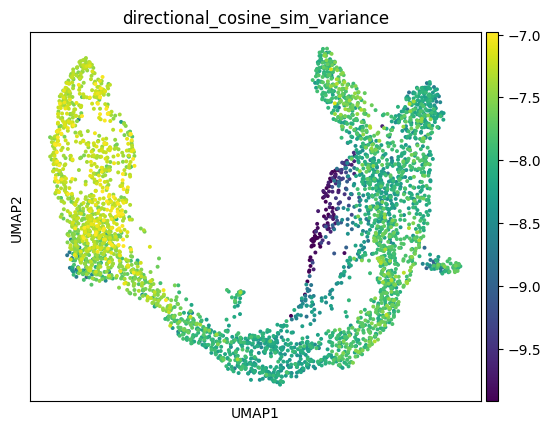

,directional_variance,directional_difference,directional_cosine_sim_variance,directional_cosine_sim_difference,directional_cosine_sim_mean
index,,,,,
AAACCTGAGAGGGATA,0.000029,0.015111,1.260145e-08,0.000255,0.999855
AAACCTGAGCCTTGAT,0.000061,0.023752,3.216499e-08,0.000498,0.999800
AAACCTGAGGCAATTA,0.000024,0.017141,8.115700e-09,0.000300,0.999857
AAACCTGCATCATCCC,0.000062,0.022442,4.224481e-08,0.000527,0.999722
AAACCTGGTAAGTGGC,0.000016,0.011061,3.655313e-09,0.000146,0.999913


In [35]:
uncertainty_df, _ = model.get_directional_uncertainty(adata, n_samples=100)
uncertainty_df.head()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 108 tasks      | elapsed:   17.1s
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:   38.2s
[Parallel(n_jobs=-1)]: Done 492 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 780 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1132 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 1548 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 2028 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 2572 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 3180 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 3696 out of 3696 | elapsed:  9.4min finished


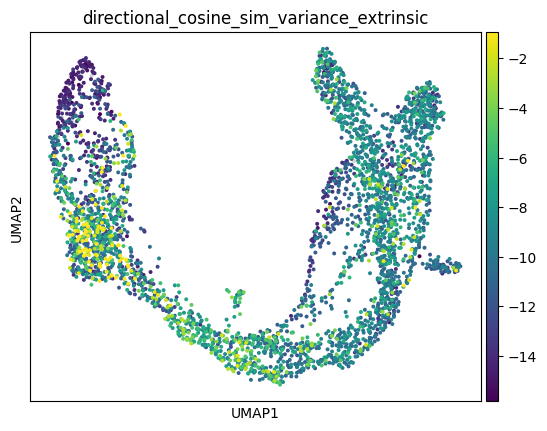

In [43]:
df = model.compute_extrinsic_uncertainty(
    adata,
    n_samples=25, 
    n_jobs=-1,
    show_plot=True)